In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

# search model's results

In [149]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_models_from_rootdir

survey_name = 'alerceZTFv7.1'
kf = 0
mode = 'fine-tuning'
set_name = f'{kf}@r_test' # s_train r_train s_val r_val r_test
rootdir = f'../save/experiments/{set_name}'
cset_name = set_name.split('@')[-1]
model_names = get_models_from_rootdir(f'{rootdir}/{mode}')
for kmn,model_name in enumerate(model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=LSTM°mode=fine-tuning°rsc=0
[2] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=avg°mode=fine-tuning°rsc=0
[3] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[4] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[5] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[6] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=1
[7] mdl=Pa

In [153]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import filter_models

condition_dict = {
    #'cell':['GRU', 'LSTM'],
    #'aggr':['max', 'avg'],
    'mdl':['ParallelTimeSelfAttn', 'SerialTimeSelfAttn'],
    'rsc':['0'],
}

idxs = [0,3,5] # gru max 32
idxs += [9, 12, 14]
idxs += [6]

new_model_names = model_names
new_model_names = filter_models(model_names, condition_dict)
new_model_names = [model_names[idx] for idx,model_name in enumerate(model_names) if idx in idxs]
for kmn,model_name in enumerate(new_model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[2] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=1
[4] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=8°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[5] mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°aggr=avg°mode=fine-tuning°rsc=0
[6] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0


# metrics v/s days

In [151]:
baselines_dict = {
    'r_val':{
        'b-accuracy':65.86,
        'b-f1score':.43,
    },
    'r_test':{
        'b-accuracy':60.38,
        'b-f1score':.45,
    },
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0][10#] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1][10#] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[2][10#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3][4#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=1
[4][10#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=8°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[5][10#] mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°aggr=avg°mode=fine-tuning°rsc=0
[6][5#] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0


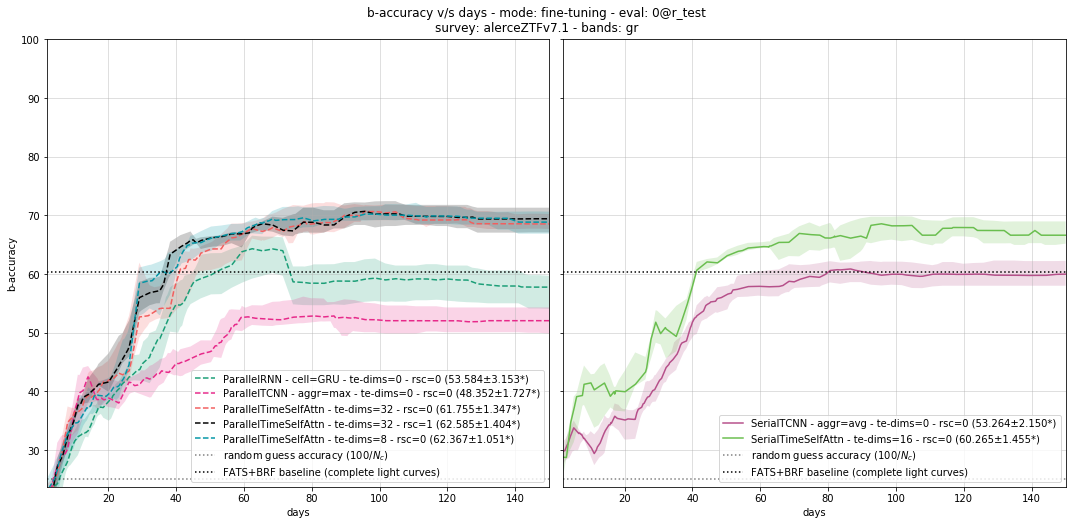

In [152]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_metric

label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
]
kwargs = {
    'label_keys':label_keys,
    'set_name':set_name,
}
metric_name = 'b-accuracy' # b-accuracy b-f1score
plot_metric(rootdir, metric_name, new_model_names, baselines_dict.get(cset_name, None), **kwargs)

In [144]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_query_df_table
from flamingchoripan.latex.latex_tables import LatexTable

kwargs = {
    'arch_modes':['Parallel', 'Serial'],
    #'arch_modes':['Serial'],
}
metric_names = ['b-accuracy', 'b-f1score', 'b-gmean', 'b-xentropy']
day_to_metric = 150
#query_key = 'cell'; query_values = ['GRU', 'LSTM']
#query_key = 'aggr'; query_values = ['avg', 'max']
query_key = 'te-dims'; query_values = [str(i) for i in [4, 8, 16, 32]]

info_df = get_query_df_table(rootdir, metric_names, new_model_names, day_to_metric, query_key, query_values, **kwargs)

latex_kwargs = {
    'caption':f'{query_key} {day_to_metric} {set_name}'.replace('_', '\\_'),
    'label':'?',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'custom_tabular_align':'l|cc|cc|cc',
    'hline_k':2,
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0][10#] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0


KeyError: '0 [Parallel]'

In [145]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_df_table
from flamingchoripan.latex.latex_tables import LatexTable
import flamingchoripan.strings as strings

def format_f(model_name):
    model_name = model_name.replace('Parallel', '')
    model_name = model_name.replace('Serial', '')
    mn_dict = strings.get_dict_from_string(model_name)
    return mn_dict['mdl']

kwargs = {
    'arch_modes':['Parallel', 'Serial'],
    #'arch_modes':['Serial'],
}
metric_names = ['b-accuracy', 'b-f1score', 'b-gmean', 'b-xentropy']
day_to_metric = 150
info_df = get_df_table(rootdir, metric_names, new_model_names, day_to_metric, format_f, **kwargs)

latex_kwargs = {
    'caption':f'{day_to_metric} {set_name}'.replace('_', '\\_'),
    'label':'?',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'custom_tabular_align':'l|cc|cc|cc',
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0][10#] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1][10#] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[2][10#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3][10#] mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[4][10#] mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[5][7#] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table

,RNN [Parallel],TCNN [Parallel],TimeSelfAttn [Parallel],RNN [Serial],TCNN [Serial],TimeSelfAttn [Serial]
metric=b-accuracy$|^{150}$,56.979±3.591,52.191±2.631,68.806±1.378,63.857±2.972,56.878±1.916,65.741±3.197
metric=b-accuracy$|_{2}^{150}$,53.584±3.153,48.352±1.727,61.755±1.347,60.180±1.681,51.732±1.413,58.355±2.237
metric=b-f1score$|^{150}$,.414±.034,.356±.022,.584±.025,.514±.028,.395±.018,.563±.027
metric=b-f1score$|_{2}^{150}$,.381±.030,.335±.017,.527±.017,.480±.026,.364±.015,.493±.028
metric=b-gmean$|^{150}$,.700±.029,.644±.024,.781±.010,.751±.022,.687±.012,.759±.023
metric=b-gmean$|_{2}^{150}$,.656±.022,.612±.016,.717±.010,.707±.013,.638±.010,.689±.019
metric=b-xentropy$|^{150}$,1.078±.039,1.163±.068,.921±.033,.992±.046,1.009±.026,.990±.045
metric=b-xentropy$|_{2}^{150}$,1.226±.048,1.223±.060,1.056±.040,1.117±.044,1.219±.036,1.160±.060


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0][10#] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0


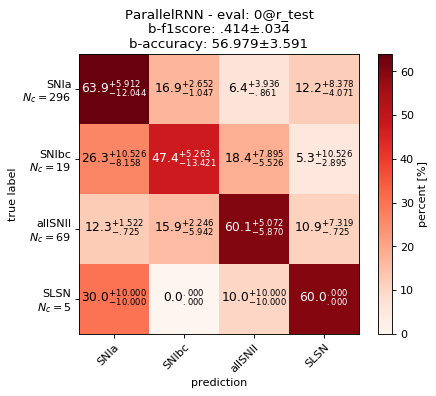

[1][10#] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0


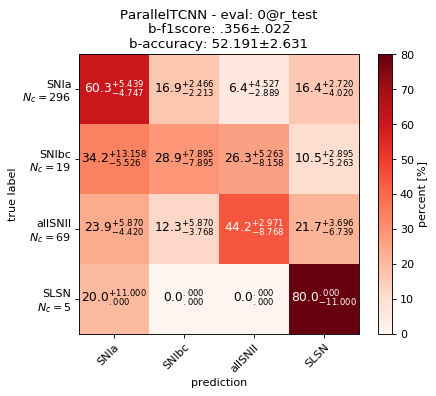

[2][10#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0


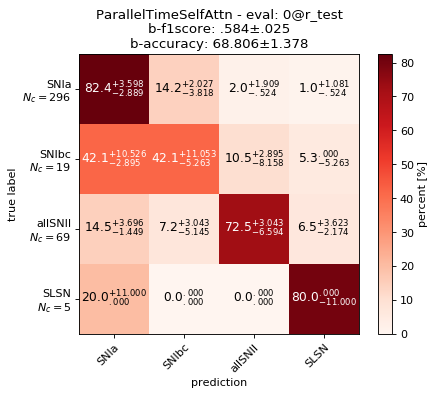

[3][10#] mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0


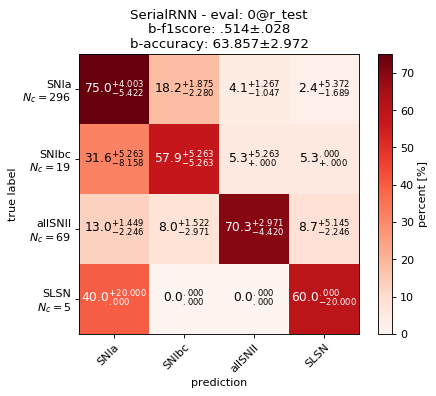

[4][10#] mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0


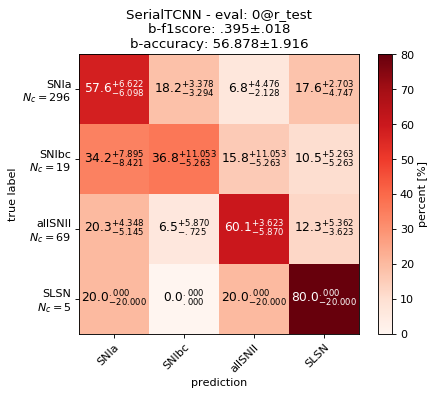

[5][7#] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0


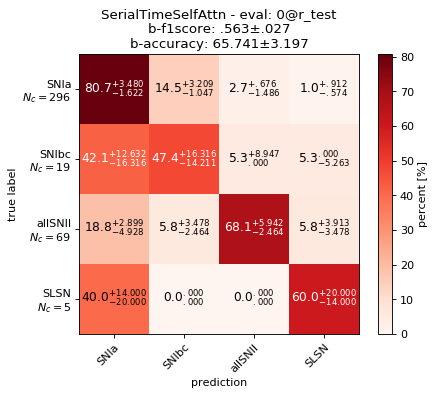

In [146]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

kwargs = {
    'lcset_name':set_name,
}
day_to_metric = 150
plot_cm(rootdir, new_model_names, day_to_metric, **kwargs)

# mse v/s days

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_mse

plot_mse(rootdir, new_model_names)

# f1score vs mse

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_f1score_mse

plot_f1score_mse(root_folder)

# Temporal encoding

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_te_scores

plot_te_scores(root_folder, error_scale=1.5)

# Precision & recall

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs
from src.results.plots import plot_precision_recall_classes

def interact_f(model_name):
    return plot_precision_recall_classes(root_folder, model_name)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
interact(interact_f, model_name=model_names)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.plots import plot_training_losses

plot_training_losses(root_folder)

# metrics & training times table

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_days

target_days = [15, 30, 60]
latex_table_metrics_days(root_folder, target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_mean

latex_table_metrics_mean(root_folder)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_parameters

latex_table_parameters(root_folder)

# confusion matrix plot

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import plot_cm

def interact_f(model_name, target_day):
    return plot_cm(root_folder, model_name, target_day)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days'][::-1]
interact(interact_f, model_name=model_names, target_day=target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import animation_cm

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days']
animation_cm(root_folder, model_names[0], target_days)